# Task6 

# Decision Tree Task 
Author: Paula Ehab Alfy.



# 1- import necassry library

In [50]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



# 2- Import data

In [5]:
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 3- Split the data to start training 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(df,y,test_size = 0.25, random_state= 0)

# 4-Scaling the features

In [51]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# 5- Train the data 

In [52]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

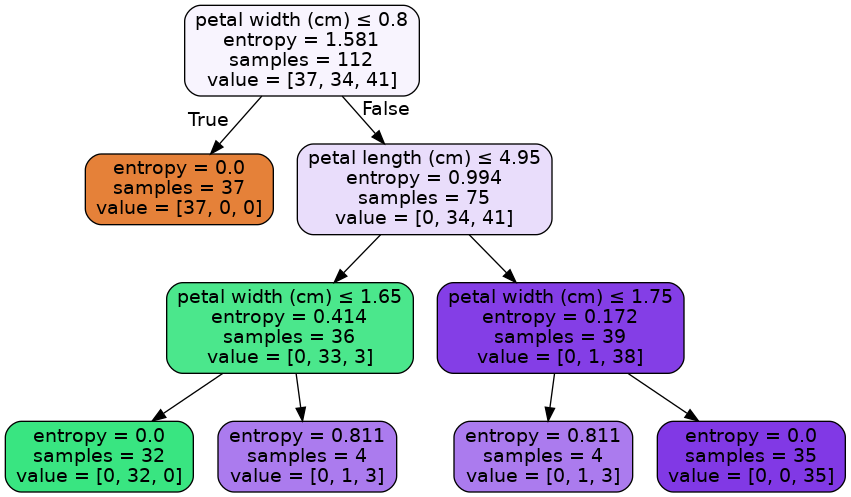

In [46]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
#prediction
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)#Accuracy
('Accuracy Score:', accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.9736842105263158)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


# 6- Use pre-purn method 

In [53]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(X_test)# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


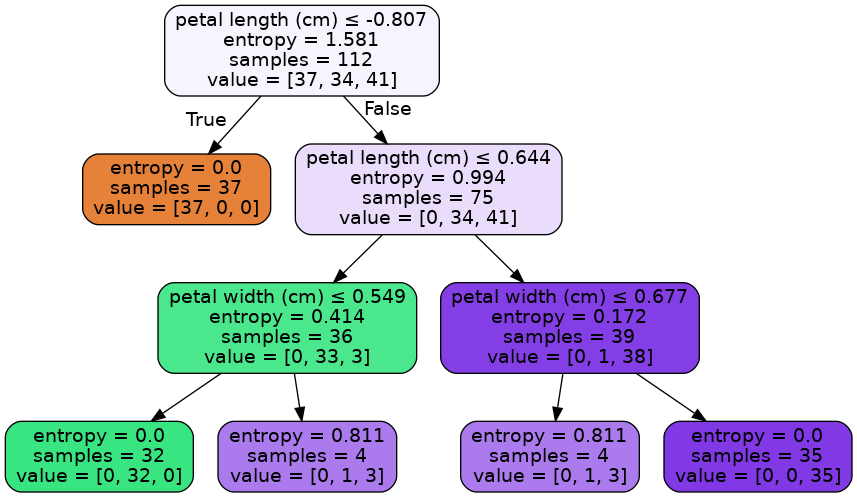

In [54]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
